In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Paintings

## Get data

### Download data

Make sure to have opened Jupyter notebook in the project folder.

In [9]:
# download data in zip file
!curl https://www.wga.hu/database/download/data_txt.zip > data_txt.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1630k  100 1630k    0     0  2336k      0 --:--:-- --:--:-- --:--:-- 2333k


In [10]:
# unzip downloaded data ands save it in a data folder
!unzip data_txt.zip -d data

Archive:  data_txt.zip
  inflating: data/catalog.csv        


If you don't have unzip installed (i.e. you receive an error like "unzip command not found" from the last cell), you can install it with `sudo apt install -y unzip`

In [11]:
# clean your directory
!rm data_txt.zip

### Import data in your notebook

In [12]:
path = os.path.join('data','catalog.csv')
df = pd.read_csv(path, encoding= 'unicode_escape') # take care of non-ASCII characters such as 'ö'

df.head(10)

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME
0,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Venus and Adonis,1574-88,"Oil on canvas, 68 x 95 cm","Fogg Art Museum, Harvard University, Cambridge",https://www.wga.hu/html/a/aachen/adonis.html,painting,mythological,German,1601-1650
1,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",https://www.wga.hu/html/a/aachen/allegory.html,painting,mythological,German,1601-1650
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/html/a/aachen/allegorz.html,painting,mythological,German,1601-1650
3,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Jupiter, Antiope and Cupid",1595-98,"Oil on copper, 31 x 21 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/antiope.html,painting,mythological,German,1601-1650
4,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Pallas Athena, Venus and Juno",1593,"Oil on canvas, 54 x 67 cm","Museum of Fine Arts, Boston",https://www.wga.hu/html/a/aachen/athena.html,painting,mythological,German,1601-1650
5,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Bacchus, Ceres and Cupid",1595-1605,"Oil on canvas, 163 x 113 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/bacchus.html,painting,mythological,German,1601-1650
6,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Bacchus, Venus and Cupid",1595-1600,"Oil on canvas, 63 x 50 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/bacchus1.html,painting,mythological,German,1601-1650
7,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",David and Bathsheba,1612-15,"Oil on canvas, 128 x 105 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/davidbat.html,painting,historical,German,1601-1650
8,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",The Amazement of the Gods,1590s,"Oil on copper, 36 x 46 cm","National Gallery, London",https://www.wga.hu/html/a/aachen/gods.html,painting,mythological,German,1601-1650
9,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Pan and Selene,1600-05,"Oil on panel, 40 x 49 cm",Private collection,https://www.wga.hu/html/a/aachen/gods1.html,painting,mythological,German,1601-1650


In [13]:
len(df)

50575

## define labels

In [50]:
df["TYPE"].unique(), df["TYPE"].nunique()

(array(['mythological', 'historical', 'genre', 'portrait', 'landscape',
        'religious', 'other', 'interior', 'still-life', 'study'],
       dtype=object),
 10)

In [33]:
df["FORM"].unique(), df["FORM"].nunique()

(array(['painting', 'ceramics', 'sculpture', 'graphics', 'architecture',
        'stained-glass', 'metalwork', 'illumination', 'mosaic', 'others',
        'furniture', 'tapestry', 'glassware'], dtype=object),
 13)

In [64]:
df["FORM"].value_counts()

painting         32008
sculpture         6878
architecture      4480
graphics          4130
illumination      1636
mosaic             419
metalwork          408
tapestry           167
furniture          153
stained-glass      136
ceramics           113
glassware           37
others              10
Name: FORM, dtype: int64

In [15]:
df.dtypes # if we want to use the dates, we need to do some preprocessing

AUTHOR       object
BORN-DIED    object
TITLE        object
DATE         object
TECHNIQUE    object
LOCATION     object
URL          object
FORM         object
TYPE         object
SCHOOL       object
TIMEFRAME    object
dtype: object

In [16]:
df.isnull().sum() # we might have to check for other types of null values (maybe '', or '-')

AUTHOR       0
BORN-DIED    0
TITLE        0
DATE         0
TECHNIQUE    0
LOCATION     0
URL          0
FORM         0
TYPE         0
SCHOOL       0
TIMEFRAME    0
dtype: int64

### Initial preprocessing

We need to transform the URL (currently an html page) into the usual representation of an image (i.e. np.array of shape (width,height,channels)

#### Get link from html to jpg

The URL of the image is in html form. We need to adjust this URL to get the direct link to the image. This adjustment is based on how the website was built.

In [17]:
def get_jpg_link(html_link: str) -> str:
    """Tranform the html_link of the image to its respective jpg_link"""
    
    jpg_link = html_link.replace('html','art', 1).replace('html','jpg')
    
    return jpg_link

In [18]:
html_link_test = 'https://www.wga.hu/html/a/aachen/adonis.html'
get_jpg_link(html_link_test) # should return 'https://www.wga.hu/art/a/aachen/adonis.jpg'

'https://www.wga.hu/art/a/aachen/adonis.jpg'

#### Transform jpg to NumPy array

In [19]:
def jpg_to_array(jpg_link: str) -> np.ndarray:
    """Given an image jpg_link, it returns its vectorial representation"""
    
    img_vector = plt.imread(jpg_link, format='jpg')
    
    return img_vector

<class 'numpy.ndarray'> (1025, 900, 3)


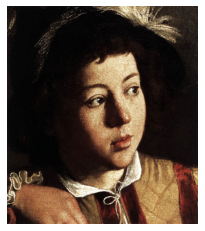

In [20]:
random_img_html = df.iloc[np.random.randint(0,len(df))]['URL']
random_img_jpg = get_jpg_link(random_img_html)
random_img_arr = jpg_to_array(random_img_jpg)

print(type(random_img_arr), random_img_arr.shape)

plt.imshow(random_img_arr)
plt.axis('off');

<class 'numpy.ndarray'> (835, 1165, 3)


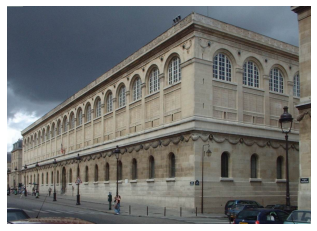

In [23]:
random_img_html = df.iloc[np.random.randint(0,len(df))]['URL']
random_img_jpg = get_jpg_link(random_img_html)
random_img_arr = jpg_to_array(random_img_jpg)

print(type(random_img_arr), random_img_arr.shape)

plt.imshow(random_img_arr)
plt.axis('off');

In [38]:
df["URL"][:5]

0      https://www.wga.hu/html/a/aachen/adonis.html
1    https://www.wga.hu/html/a/aachen/allegory.html
2    https://www.wga.hu/html/a/aachen/allegorz.html
3     https://www.wga.hu/html/a/aachen/antiope.html
4      https://www.wga.hu/html/a/aachen/athena.html
Name: URL, dtype: object

Run the above cell a few times. Notice how we have different sizes for different images! This is something we should probably take care of (maybe padding? Or size reduction?)

In [48]:
feat_lst = []
for i in df["URL"][:20]:
    random_img_html = df.iloc[np.random.randint(0,len(df))]['URL']
    random_img_jpg = get_jpg_link(random_img_html)
    random_img_arr = jpg_to_array(random_img_jpg)
    feat_lst.append(random_img_arr.shape)
print(np.array(feat_lst))

[[1300  908    3]
 [1425 1000    3]
 [1100 1100    3]
 [ 864 1255    3]
 [1000  954    3]
 [ 900  647    3]
 [ 720 1083    3]
 [ 652  726    3]
 [1131  900    3]
 [ 922  785    3]
 [1300 1746    3]
 [ 770 1097    3]
 [ 650  465    3]
 [1003  804    3]
 [ 950 1099    3]
 [1173 2000    3]
 [ 774 1200    3]
 [ 858  725    3]
 [ 663 1250    3]
 [1280 1000    3]]


### minimal preprocessing

In [ ]:
date = []
labels = []

In [108]:
# load and resize images - 128x128 pixels??


from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential  

model = Sequential()    
model = keras.Sequential

def load_image():
    random_img_html = df.iloc[np.random.randint(0,len(df))]['URL']
    random_img_jpg = get_jpg_link(random_img_html)
    x = jpg_to_array(random_img_jpg)
    x = np.expand_dims(x, axis=0)
    #x = x.reshape((256, -1, 3))
    #x = preprocess_input(x)
    
    return random_img_html , x


random_img_html , x = load_image()
print("shape of x: ", x.shape)
print("data type: ", x.dtype)


shape of x:  (1, 935, 850, 3)
data type:  uint8


In [ ]:
# Flatten our 766 images
X = faces.images.reshape(766, 31*23)
X.shape

In [25]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

Test and feature extraction

In [111]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [112]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [113]:
random_img_html = df.iloc[np.random.randint(0,len(df))]['URL']
random_img_jpg = get_jpg_link(random_img_html)
x = jpg_to_array(random_img_jpg)
    
#img, x = load_image("101_ObjectCategories/Leopards/image_0019.jpg")
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

ValueError: in user code:

    /Users/juliaschmitt/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /Users/juliaschmitt/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/juliaschmitt/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/juliaschmitt/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/juliaschmitt/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/juliaschmitt/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /Users/juliaschmitt/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /Users/juliaschmitt/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/juliaschmitt/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model: expected shape=(None, 224, 224, 3), found shape=(None, 1200, 3)


## Product ideas

### Paintings that look like pictures

The user takes a picture of something that he likes (e.g. a sunrise on the sea). The algorithm returns the painting that is most similar to the picture (e.g. _Impression, Sunrise_ by Claude Monet)

<table>
    <tr>
        <td style="text-align:center;font-size:15px"><strong>Uploaded by the user</strong></td>
        <td></td>
        <td style="text-align:center;font-size:15px"><strong>Returned by algorithm</strong></td>
    </tr>
    <tr>
        <td> <img src="https://pixnio.com/free-images/2017/10/17/2017-10-17-05-52-13.jpg" width="300"/> </td>
        <td>
            <img src="https://www.clipartkey.com/mpngs/m/38-380671_arrows-black-right-arrow-white-background.png" width="50"/>
        </td>
        <td> <img src="https://www.wga.hu/art/m/monet/03/0impress.jpg" width="300"/> </td>
    </tr>
</table>

In [ ]:
df[df['TITLE'] == 'Impression, Sunrise']

### Paintings recommender system

The user types the title of his favourite painting (e.g. `Impression, Sunrise`). The algorithm returns a list of other painting that are similar to the input and that the user might like.

<table>
    <tr>
        <td style="text-align:center;font-size:15px"><strong>Uploaded by the user</strong></td>
        <td></td>
        <td style="text-align:center;font-size:15px"><strong>Returned by algorithm</strong></td>
    </tr>
    <tr>
        <td style="text-align:center;font-size:26px">"Impression, Sunrise"</td>
        <td>
            <img src="https://www.clipartkey.com/mpngs/m/38-380671_arrows-black-right-arrow-white-background.png" width="50"/>
        </td>
        <td>
            <table>
                <tr>
                    <td>
                        <img src="https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/ocean-sunrise-sandy-hemmer.jpg" width="150"/>
                    </td>
                    <td>
                        <img src="https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/abstract-ocean-bay-sunrise-kathy-symonds.jpg" width="150"/>
                    </td>
                    <td>
                        <img src="https://i.pinimg.com/736x/d8/27/c0/d827c0d8164c3ffea31cdb36dad5eeb1.jpg" width="150"/>
                    </td>
                </tr>
            </table>
        </td>
    </tr>
</table>

### Any other idea?